In [131]:
import os
import glob
import re
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=10)

In [132]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [133]:
# method to download latest data directly from facebook?

In [134]:

# https://github.com/quynhneo/arxiv-public-datasets_for_kaggle/blob/master/arxiv_public_data/fulltext.py
def sorted_files(globber: str):
    """
    Give a globbing expression of files to find. They will be sorted upon
    return.  This function is most useful when sorting does not provide
    numerical order,
    e.g.:
        9 -> 12 returned as 10 11 12 9 by string sort
    In this case use num_sort=True, and it will be sorted by numbers in the
    string, then by the string itself.
    Parameters
    ----------
    globber : str
        Expression on which to search for files (bash glob expression)
    """
    files = glob.glob(globber, recursive = True) # return a list of path, including sub directories
    files.sort()

    allfiles = []

    for fn in files:
        nums = re.findall(r'\d+', fn) # regular expression, find number in path names
        data = [str(int(n)) for n in nums] + [fn]
        # a list of [first number, second number,..., filename] in string format otherwise sorted fill fail
        allfiles.append(data) # list of list

    allfiles = sorted(allfiles)
    return [f[-1] for f in allfiles] # sorted filenames

In [135]:
path = 'roxanne_messages'
globber = os.path.join(path, '*.json')
jsonfiles = sorted_files(globber)

In [136]:
def json_to_message(file):
    """load message to data frame, decode content and sender_name, convert time stamp to date"""
    data = json.load(open(file,'r'))
    df=pd.DataFrame(data['messages'])
    df.content = df.content.apply(lambda x: str(x).encode('latin1').decode('utf8'))
    df.sender_name = df.sender_name.apply(lambda x: str(x).encode('latin1').decode('utf8'))
    df.timestamp_ms = df.timestamp_ms.apply(lambda x: datetime.date.fromtimestamp(x/1000) )
    return df

In [137]:
# iterate list of files, load data into data frame, and join them
frame =[]
for file in jsonfiles:
    df = json_to_message(file)
    frame.append(df)
df = pd.concat(frame)

In [138]:
# n_total=0
# n_content =0
# n_time=0
# for msg in data['messages']:
#     n_total +=1
#     print(datetime.date.fromtimestamp(msg['timestamp_ms']/1000),
#     "\n ---")
#     try:
#         print(msg['content'].encode('latin1').decode('utf8'))
#         n_content +=1

#     except:
#         pass
    

In [158]:
df[['sender_name','timestamp_ms','content']].sort_values('timestamp_ms').tail()

sender_name timestamp_ms                                            content
4       user1   2021-01-18  tr·ªùi oiiiiiiii m√≥n n√†y sinh ra t·ª´ khi n√†o v·∫≠y ...
3       user1   2021-01-19                                                nan
2       user1   2021-01-19                                               hixx
1       user2   2021-01-19                           full of sugar, bad fo ya
0       user1   2021-01-19           a whole cube of joy, very good fo ya =))

In [141]:
# bin data by month: sending frequencies, sending frequencies by senders, top few words 

In [142]:
# who send the most messages?
df.groupby('sender_name').count().reset_index().sort_values('content',ascending=False)\
[['sender_name','sticker','content','reactions']].rename(columns={'content':'messages'}).reset_index(drop=True)

sender_name  sticker  messages  reactions
0        user1     1237     19098       5704
1        user4       40     18634       3814
2        user8        4      8548       1879
3        user7      336      6742       1167
4        user3      244      6114       1748
5        user2       14      6077       2318
6       user13       99      5914       1770
7        user9        2      3555       1248
8        user5       20      3529        962
9       user11        6      2252        644
10      user12        2      2040        734
11       user6       18      1741        544
12      user10        0      1289        597
13      user14        0        10          5

In [143]:
df_by_month = df[['sender_name','timestamp_ms','content']]

df_by_month['month'] = df_by_month.timestamp_ms.\
apply(lambda x: datetime.datetime(x.year, x.month, 1))


<ipython-input-143-5eefcfbf9272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_month['month'] = df_by_month.timestamp_ms.\


In [144]:
df_by_month.head(10)

sender_name timestamp_ms                                            content  \
0       user1   2021-01-19           a whole cube of joy, very good fo ya =))   
1       user2   2021-01-19                           full of sugar, bad fo ya   
2       user1   2021-01-19                                               hixx   
3       user1   2021-01-19                                                nan   
4       user1   2021-01-18  tr·ªùi oiiiiiiii m√≥n n√†y sinh ra t·ª´ khi n√†o v·∫≠y ...   
5       user1   2021-01-18    m·∫•y anh ch·ªã em tr√°nh xa m·∫•y n∆°i manh ƒë·ªông nha!!   
6       user1   2021-01-18  tr·ªùi m√† nh·∫Øc m·ªõi nh·ªõ, h·ªã h·ªã b·∫£o sao 3h s√°ng ƒë√™...   
7       user2   2021-01-18  2 more days of Trump! Wed c√≥ th·ªÉ s·∫Ω th√∫ v·ªã he he.   
8       user3   2021-01-16  D·∫° n√≥ th·ª±c ra ko t·ªën nhi·ªÅu thgian. Ch·∫≥ng qua k...   
9       user4   2021-01-16  Same here. ƒê·ª£t n√†o l√†m k ra lad xu·ªëng k√≠ li·ªÅn....   

       month  
0 2021-01-01  
1 2021-01-01  
2 2021-01-01  
3 2021-01-01  
4 2021-01-01  
5 2021-01-01  
6 2021-01-01  
7 2021-01-01  
8 2021-01-01  
9 2021-01-01

In [145]:
msg_per_day=df_by_month[['sender_name','timestamp_ms','month']]
# remove the last month manually
msg_per_day=msg_per_day[msg_per_day.month != datetime.datetime(2021,1,1)]
msg_per_day=msg_per_day[['sender_name','timestamp_ms']].groupby(['timestamp_ms']).\
count().reset_index().rename(columns={"sender_name":"msg_num"})
msg_per_day.shape

(444, 2)

In [146]:
msg_per_day.timestamp_ms.iloc[-1:]

443    2020-12-28
Name: timestamp_ms, dtype: object

findfont: Font family ['Segoe UI Emoji'] not found. Falling back to DejaVu Sans.


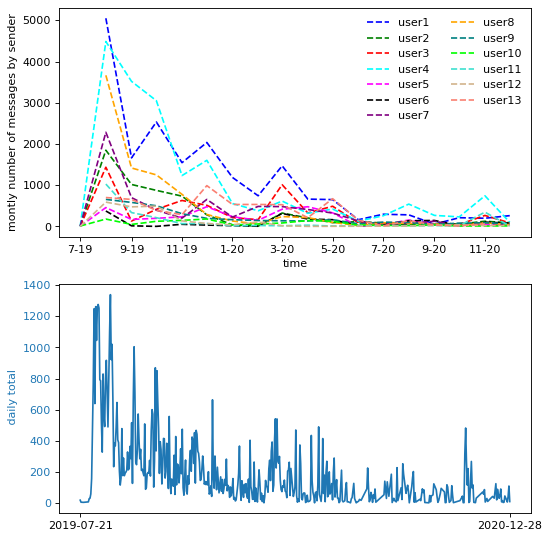

In [147]:
# plot senders by month
# iterate sender names, plot content vs time
from cycler import cycler
# list of names
names=df_by_month.sender_name.unique()
names=names[names != 'user14']

months=df_by_month[df_by_month.sender_name=='user2'].\
    groupby('month').count().reset_index().month
# tickmark time
timemarks=[str(x.month) +'-'+ str(x.year-2000) for x in months]


fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
ax, ax2 = axes.flatten()

colorcycle = cycler('color', ['blue', 'green', 'red', 'cyan', 'magenta',  'black', 'purple',
                                    'orange', 'teal',  'lime', 
                                    'turquoise', 'tan', 'salmon', 'gold'])
ax.set_prop_cycle(colorcycle)

# plot by month, drop last month
for name in names:
    xx= df_by_month[df_by_month.sender_name==name].\
    groupby('month').count().reset_index() # sender vs number of messages
    
    ax.plot(xx.month.iloc[:-1],xx.content.iloc[:-1],'--',label=name.split()[0])
    

# ax.legend(frameon=False, bbox_to_anchor=(0., 1.1, 1., .102), loc='lower left',
#                ncol=3, mode="expand", borderaxespad=0.)
ax.legend(frameon=False, loc='upper right',
               ncol=2)
ax.set_prop_cycle(colorcycle)
#plt.yscale('log')


ax.set_ylabel('montly number of messages by sender')
ax.set_xlabel('time')
ax.set_xticklabels(timemarks[:-1][0::2])
#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(' daily total', color=color)  # we already handled the x-label with ax1
ax2.plot(msg_per_day.timestamp_ms, msg_per_day.msg_num, '-',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(msg_per_day.timestamp_ms[::len(msg_per_day.timestamp_ms)-1])
ax2.set_xticklabels(msg_per_day.timestamp_ms[::len(msg_per_day.timestamp_ms)-1])
#ax2.set_xticklabels(msg_per_day.timestamp_ms.apply(lambda x:str(x.day)+'-'+ str(x.month))[0::30])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [148]:
time_content= df_by_month[['month','content']]
time_content.head()

month                                            content
0 2021-01-01           a whole cube of joy, very good fo ya =))
1 2021-01-01                           full of sugar, bad fo ya
2 2021-01-01                                               hixx
3 2021-01-01                                                nan
4 2021-01-01  tr·ªùi oiiiiiiii m√≥n n√†y sinh ra t·ª´ khi n√†o v·∫≠y ...

transform will act on the group, but return the same number of rows

In [149]:
time_content.content =time_content.groupby('month')['content'].transform(lambda x: ",".join(x))

/Users/qmn203/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [150]:
time_content.head()

month                                            content
0 2021-01-01  a whole cube of joy, very good fo ya =)),full ...
1 2021-01-01  a whole cube of joy, very good fo ya =)),full ...
2 2021-01-01  a whole cube of joy, very good fo ya =)),full ...
3 2021-01-01  a whole cube of joy, very good fo ya =)),full ...
4 2021-01-01  a whole cube of joy, very good fo ya =)),full ...

In [151]:
monthly=time_content.content.drop_duplicates()
monthly.shape

(19,)

In [152]:
import collections
#table=pd.DataFrame({'ti·ªÅn':[],'y√™u':[], 'g√°i':[], 'ƒÉn':[], 'ch∆°i':[],'h·ªçc':[]})
table=pd.DataFrame({'üòÇ':[],'üòÖ':[], 'üòá':[],'üòâ':[],
                    'üò≥':[],'üòÜ':[],'üòú':[],'üòï':[],'üòç':[],'ng·ªß':[],'stock':[]})
table.columns

Index(['üòÇ', 'üòÖ', 'üòá', 'üòâ', 'üò≥', 'üòÜ', 'üòú', 'üòï', 'üòç', 'ng·ªß', 'stock'], dtype='object')

In [153]:
lol=[]

for mo in monthly.iloc[:-1]:
    splitt = mo.lower().split()
    ll=[]
    for word in table.columns:
        ll.append(collections.Counter(splitt)[word]/len(splitt))
        #print(collections.Counter(split).most_common(100))
    lol.append(ll)

table=table.append(pd.DataFrame(lol,columns = table.columns))
    

In [154]:
table.head()

üòÇ         üòÖ    üòá    üòâ    üò≥    üòÜ    üòú    üòï         üòç       ng·ªß  \
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000227  0.000227   
1  0.000396  0.000132  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
2  0.000241  0.000060  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000120   
3  0.000371  0.000186  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.001486   
4  0.000294  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000294   

      stock  
0  0.000907  
1  0.000000  
2  0.000962  
3  0.000371  
4  0.002204

In [155]:
months

0    2019-07-01
1    2019-08-01
2    2019-09-01
3    2019-10-01
4    2019-11-01
5    2019-12-01
6    2020-01-01
7    2020-02-01
8    2020-03-01
9    2020-04-01
10   2020-05-01
11   2020-06-01
12   2020-07-01
13   2020-08-01
14   2020-09-01
15   2020-10-01
16   2020-11-01
17   2020-12-01
18   2021-01-01
Name: month, dtype: datetime64[ns]

In [156]:

mpl.rc('font',size=20)

Text(0.5, 1.0, 'some common emoticons')

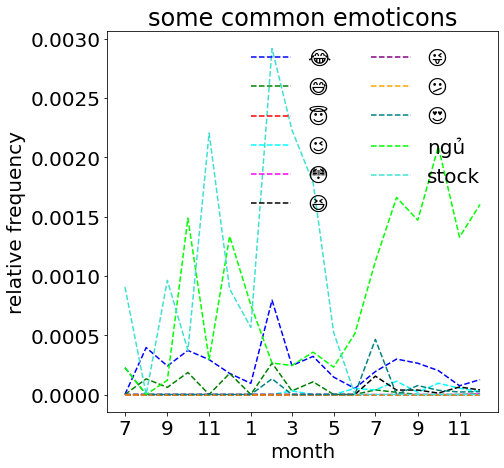

In [157]:
fig,ax = plt.subplots(figsize=(7, 7))
ax.set_prop_cycle(colorcycle)
for word in table.columns:
    plt.plot(months.iloc[:-1], table[word],'--',label= str(word) )
    
# ax.legend(frameon=False, bbox_to_anchor=(0., 1.1, 1., .102), loc='lower left',
#                ncol=3, mode="expand", borderaxespad=0.)
ax.legend(frameon=False, loc='upper right',
               ncol=2, )
#plt.yscale('log')

ax.set_xticklabels([x.split('-')[0] for x in timemarks][0::2])
ax.set_ylabel('relative frequency')
ax.set_xlabel('month')
ax.set_title('some common emoticons')